<a href="https://colab.research.google.com/github/Zurezh/MachineLearningClassification/blob/master/ClaimsPred_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

In [0]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [0]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('Clinical_dataset.csv')

In [4]:
df.head()

,List ID,PGO Generic Product ID,PNO Current Drug Status,PNO Qty Maximum,PNO Days Supply Minimum,PNO Qty Minimum,PNO Days Supply Maximum,PNO Period Qty Days,PNO Period Qty Maximum,RSTNDCLST,SMART_PA_SCH,Status
0,ACEACSF,7.00E+12,N,0,0,0,0,0,0.0,NaN,NaN,P
1,ACEACSF,7.00E+12,N,0,0,0,0,0,0.0,ACFPG00089,ACFPG00089,R
2,ACEACSF,1.21E+13,R,0,0,0,0,0,0.0,NaN,NaN,R
3,ACEACSF,1.21E+13,R,0,0,0,0,0,0.0,NaN,NaN,R
4,ACEACSF,1.21E+13,R,0,0,0,0,0,0.0,NaN,NaN,R


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8107 entries, 0 to 8106
Data columns (total 12 columns):
List ID                    8107 non-null object
PGO Generic Product ID     8107 non-null object
PNO Current Drug Status    8107 non-null object
PNO Qty Maximum            8107 non-null int64
PNO Days Supply Minimum    8107 non-null int64
PNO Qty Minimum            8107 non-null int64
PNO Days Supply Maximum    8107 non-null int64
PNO Period Qty Days        8107 non-null int64
PNO Period Qty Maximum     8107 non-null float64
RSTNDCLST                  254 non-null object
SMART_PA_SCH               254 non-null object
Status                     8107 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 760.2+ KB


In [6]:
# missing values
round(100*(df.isnull().sum()/len(df)),2)

List ID                     0.00
PGO Generic Product ID      0.00
PNO Current Drug Status     0.00
PNO Qty Maximum             0.00
PNO Days Supply Minimum     0.00
PNO Qty Minimum             0.00
PNO Days Supply Maximum     0.00
PNO Period Qty Days         0.00
PNO Period Qty Maximum      0.00
RSTNDCLST                  96.87
SMART_PA_SCH               96.87
Status                      0.00
dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8107 entries, 0 to 8106
Data columns (total 12 columns):
List ID                    8107 non-null object
PGO Generic Product ID     8107 non-null object
PNO Current Drug Status    8107 non-null object
PNO Qty Maximum            8107 non-null int64
PNO Days Supply Minimum    8107 non-null int64
PNO Qty Minimum            8107 non-null int64
PNO Days Supply Maximum    8107 non-null int64
PNO Period Qty Days        8107 non-null int64
PNO Period Qty Maximum     8107 non-null float64
RSTNDCLST                  254 non-null object
SMART_PA_SCH               254 non-null object
Status                     8107 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 760.2+ KB


In [9]:
# dropping RSTNDCLST and SMART_PA_SCH coulmns with null values
mdf = df.drop(columns=['RSTNDCLST','SMART_PA_SCH'])
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8107 entries, 0 to 8106
Data columns (total 10 columns):
List ID                    8107 non-null object
PGO Generic Product ID     8107 non-null object
PNO Current Drug Status    8107 non-null object
PNO Qty Maximum            8107 non-null int64
PNO Days Supply Minimum    8107 non-null int64
PNO Qty Minimum            8107 non-null int64
PNO Days Supply Maximum    8107 non-null int64
PNO Period Qty Days        8107 non-null int64
PNO Period Qty Maximum     8107 non-null float64
Status                     8107 non-null object
dtypes: float64(1), int64(5), object(4)
memory usage: 633.5+ KB


In [11]:
mdf['GPIList_ID'] = mdf['List ID'] + '_' + mdf['PGO Generic Product ID']
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8107 entries, 0 to 8106
Data columns (total 11 columns):
List ID                    8107 non-null object
PGO Generic Product ID     8107 non-null object
PNO Current Drug Status    8107 non-null object
PNO Qty Maximum            8107 non-null int64
PNO Days Supply Minimum    8107 non-null int64
PNO Qty Minimum            8107 non-null int64
PNO Days Supply Maximum    8107 non-null int64
PNO Period Qty Days        8107 non-null int64
PNO Period Qty Maximum     8107 non-null float64
Status                     8107 non-null object
GPIList_ID                 8107 non-null object
dtypes: float64(1), int64(5), object(5)
memory usage: 696.8+ KB


In [12]:
# dropping redundant List ID and PGO Generic Product ID columns
mdf = mdf.drop(columns=['List ID','PGO Generic Product ID'])
mdf.head()

,PNO Current Drug Status,PNO Qty Maximum,PNO Days Supply Minimum,PNO Qty Minimum,PNO Days Supply Maximum,PNO Period Qty Days,PNO Period Qty Maximum,Status,GPIList_ID
0,N,0,0,0,0,0,0.0,P,ACEACSF_7.00E+12
1,N,0,0,0,0,0,0.0,R,ACEACSF_7.00E+12
2,R,0,0,0,0,0,0.0,R,ACEACSF_1.21E+13
3,R,0,0,0,0,0,0.0,R,ACEACSF_1.21E+13
4,R,0,0,0,0,0,0.0,R,ACEACSF_1.21E+13


In [13]:
from sklearn import preprocessing
# encode categorical variables using Label Encoder

# select all categorical variables
mdf_categorical = mdf.select_dtypes(include=['object'])
mdf_categorical.head()

,PNO Current Drug Status,Status,GPIList_ID
0,N,P,ACEACSF_7.00E+12
1,N,R,ACEACSF_7.00E+12
2,R,R,ACEACSF_1.21E+13
3,R,R,ACEACSF_1.21E+13
4,R,R,ACEACSF_1.21E+13


In [14]:
# apply Label encoder to df_categorical

le = preprocessing.LabelEncoder()
mdf_categorical = mdf_categorical.apply(le.fit_transform)
mdf_categorical.head()

,PNO Current Drug Status,Status,GPIList_ID
0,1,0,91
1,1,1,91
2,3,1,20
3,3,1,20
4,3,1,20


In [16]:
# concat df_categorical with original df
mdf = mdf.drop(mdf_categorical.columns, axis=1)
mdf = pd.concat([mdf, mdf_categorical], axis=1)
mdf.head()

,PNO Qty Maximum,PNO Days Supply Minimum,PNO Qty Minimum,PNO Days Supply Maximum,PNO Period Qty Days,PNO Period Qty Maximum,PNO Current Drug Status,Status,GPIList_ID
0,0,0,0,0,0,0.0,1,0,91
1,0,0,0,0,0,0.0,1,1,91
2,0,0,0,0,0,0.0,3,1,20
3,0,0,0,0,0,0.0,3,1,20
4,0,0,0,0,0,0.0,3,1,20


In [17]:
# look at column types
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8107 entries, 0 to 8106
Data columns (total 9 columns):
PNO Qty Maximum            8107 non-null int64
PNO Days Supply Minimum    8107 non-null int64
PNO Qty Minimum            8107 non-null int64
PNO Days Supply Maximum    8107 non-null int64
PNO Period Qty Days        8107 non-null int64
PNO Period Qty Maximum     8107 non-null float64
PNO Current Drug Status    8107 non-null int64
Status                     8107 non-null int64
GPIList_ID                 8107 non-null int64
dtypes: float64(1), int64(8)
memory usage: 570.1 KB


In [0]:
# convert target variable status to categorical
mdf['Status'] = mdf['Status'].astype('category')

In [0]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

In [0]:
# Putting feature variable to X
X = mdf.drop('Status',axis=1)

# Putting response variable to y
y = mdf['Status']

In [21]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 99)
X_train.head()

,PNO Qty Maximum,PNO Days Supply Minimum,PNO Qty Minimum,PNO Days Supply Maximum,PNO Period Qty Days,PNO Period Qty Maximum,PNO Current Drug Status,GPIList_ID
1751,0,0,0,0,0,0.0,4,753
5646,0,0,0,0,0,0.0,1,1114
708,0,0,0,0,0,0.0,0,448
6584,0,0,0,0,0,0.0,1,1485
3836,0,0,0,0,0,0.0,1,995


In [26]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [27]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1968
           1       1.00      0.90      0.94       465

    accuracy                           0.98      2433
   macro avg       0.99      0.95      0.97      2433
weighted avg       0.98      0.98      0.98      2433



In [28]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))


[[1967    1]
 [  48  417]]
0.9798602548294287


In [29]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(mdf.columns[1:])
features

['PNO Days Supply Minimum',
 'PNO Qty Minimum',
 'PNO Days Supply Maximum',
 'PNO Period Qty Days',
 'PNO Period Qty Maximum',
 'PNO Current Drug Status',
 'Status',
 'GPIList_ID']

In [0]:
import os
os.environ["PATH"] += os.pathsep + 'D:/graphviz-2.38/release/bin/'

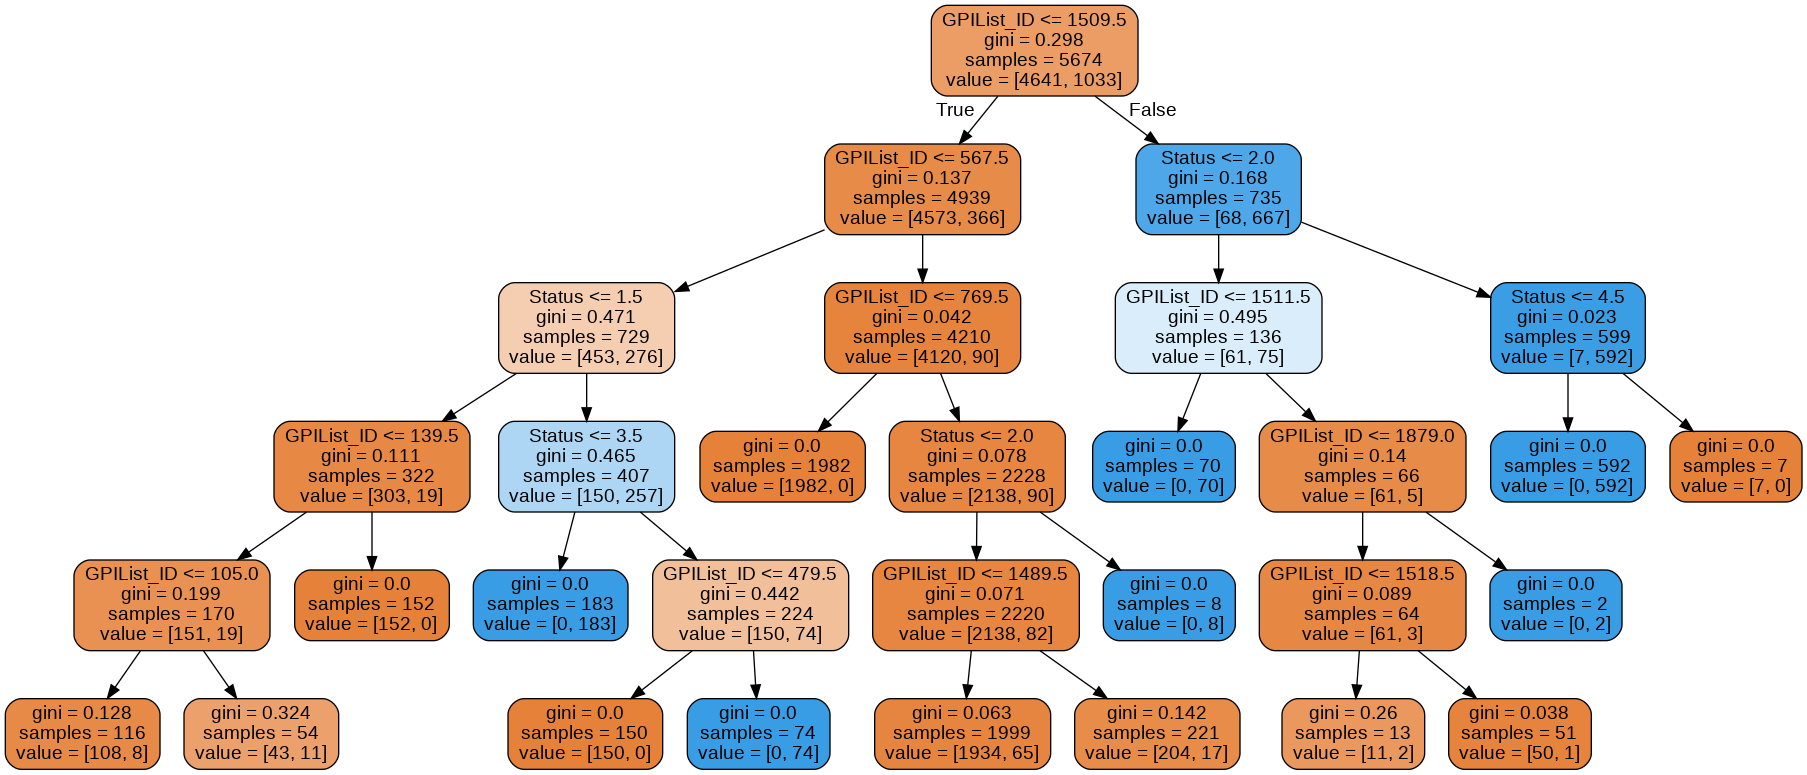

In [31]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


In [32]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
 

In [33]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004735,0.001231,0.001657,0.000200,1,{'max_depth': 1},0.928634,0.926872,0.917181,0.919824,0.925044,0.923511,0.004326,38
1,0.004704,0.000195,0.001653,0.000194,2,{'max_depth': 2},0.928634,0.926872,0.917181,0.919824,0.925044,0.923511,0.004326,38
2,0.004970,0.000185,0.001612,0.000146,3,{'max_depth': 3},0.949780,0.950661,0.950661,0.955066,0.960317,0.953297,0.003967,37
3,0.005281,0.000203,0.001582,0.000123,4,{'max_depth': 4},0.966520,0.970044,0.962115,0.971806,0.970018,0.968100,0.003450,36
4,0.005283,0.000151,0.001656,0.000170,5,{'max_depth': 5},0.978855,0.982379,0.977093,0.984141,0.983245,0.981142,0.002705,5


In [35]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_max_depth"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

KeyError: ignored

<Figure size 432x288 with 0 Axes>